In [1]:
import pandas as pd
df = pd.read_csv("yacht_hydro.csv")

# Rr sütunundaki verilerin ortalamasını hesaplıyoruz
mean = df["Rr"].mean()

# Rr sütunundaki verilerin medyanını (ortanca değer) hesaplıyoruz
median = df["Rr"].median()

# Rr sütununun varyansını hesaplıyoruz (dağılımın kare ortalaması)
var = df["Rr"].var()

# Rr sütununun standart sapmasını hesaplıyoruz (verilerin ortalamaya uzaklığı)
std = df["Rr"].std()

# Rr sütununun standart hatasını hesaplıyoruz (ortalama güvenilirliği)
se = std / (len(df["Rr"]) ** 0.5)

# Sonuçları ekrana yazdırıyoruz
print(f"Ortalama: {mean}")
print(f"Medyan: {median}")
print(f"Varyans: {var}")
print(f"Standart Sapma: {std}")
print(f"Standart Hata: {se}")


Ortalama: 10.495357142857143
Medyan: 3.065
Varyans: 229.84046013261965
Standart Sapma: 15.160490101992734
Standart Hata: 0.8638490957168635


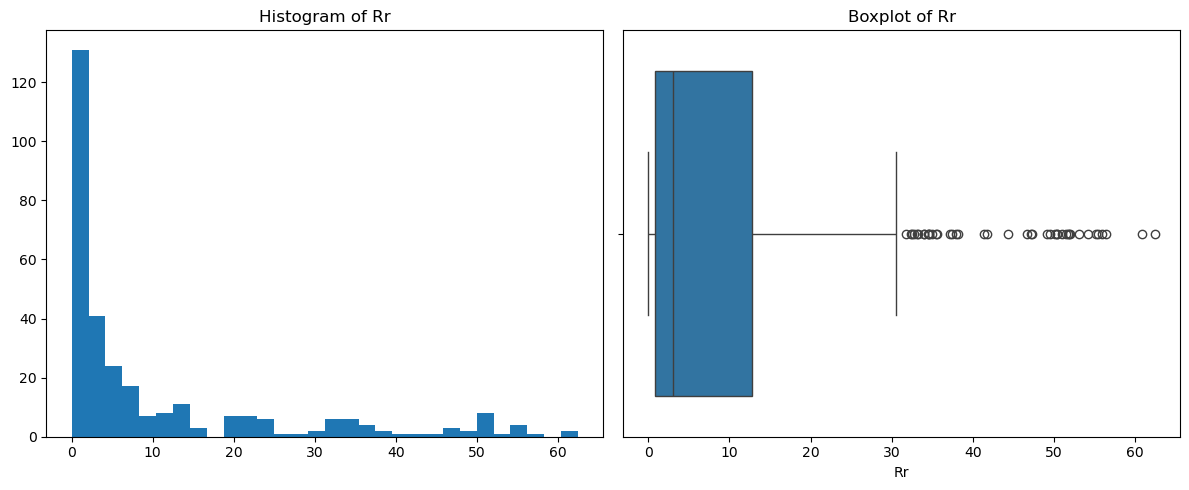

In [9]:
# Gerekli kütüphaneleri içe aktarıyoruz
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik alanının boyutunu ayarlıyoruz (genişlik x yükseklik)
plt.figure(figsize=(12, 5))

# İlk alt grafik: Histogram
plt.subplot(1, 2, 1)  # 1 satır, 2 sütunluk alanda 1. grafik
plt.hist(df["Rr"], bins=30)  # Rr sütununu 30 aralıkla histogram olarak çiziyoruz
plt.title("Histogram of Rr")  # Başlık ekliyoruz

# İkinci alt grafik: Boxplot (Kutu grafiği)
plt.subplot(1, 2, 2)  # 1 satır, 2 sütunluk alanda 2. grafik
sns.boxplot(x=df["Rr"])  # Rr sütununa ait boxplot çizimi
plt.title("Boxplot of Rr")  # Başlık ekliyoruz

# Alt grafikler arasında düzenli boşluk bırakmak için layout ayarlanıyor
plt.tight_layout()

# Grafikleri ekranda gösteriyoruz
plt.show()

#Yorum: Histogram sağa çarpık (right-skewed) bir dağılım gösteriyor.

# Bu, verilerin büyük kısmının küçük Rr değerlerinde yoğunlaştığını ama bazı yüksek Rr değerlerinin olduğunu gösteriyor.

# Histogram, verinin sağa çarpık olduğunu ve bazı yüksek dirençli teknelerin aykırı olduğunu gösterir.

# Boxplot, veri setinde çok sayıda yüksek Rr değerli aykırı gözlem olduğunu gösterir.


In [4]:
# Rr sütununun %25'lik (1. çeyrek) değerini hesaplıyoruz
Q1 = df["Rr"].quantile(0.25)

# Rr sütununun %75'lik (3. çeyrek) değerini hesaplıyoruz
Q3 = df["Rr"].quantile(0.75)

# IQR: Interquartile Range (çeyrekler arası açıklık) hesaplanıyor
IQR = Q3 - Q1

# Aykırı değerleri tespit etmek için alt sınır belirleniyor
alt_sinir = Q1 - 1.5 * IQR

# Aykırı değerleri tespit etmek için üst sınır belirleniyor
ust_sinir = Q3 + 1.5 * IQR

# Belirlenen alt ve üst sınırların dışında kalan veriler aykırı değer olarak kabul ediliyor
outliers = df[(df["Rr"] < alt_sinir) | (df["Rr"] > ust_sinir)]

# Aykırı değer sayısını ekrana yazdırıyoruz
print(f"Aykırı değer sayısı: {len(outliers)}")



Aykırı değer sayısı: 42


In [5]:
# Gerekli kütüphaneleri yüklüyoruz
import scipy.stats as stats
import numpy as np

# Rr sütunundaki veri sayısını hesaplıyoruz
n = len(df["Rr"])

# Ortalama, standart sapma ve varyansı hesaplıyoruz
mean = df["Rr"].mean()
std = df["Rr"].std()
var = df["Rr"].var()

# --- Ortalama için %95 güven aralığı ---

# %95 güven düzeyine karşılık gelen Z değeri
z = 1.96

# Standart hata (SE) = s / sqrt(n)
se = std / np.sqrt(n)

# Ortalama için alt ve üst güven sınırlarını hesaplıyoruz
ci_mean = (mean - z * se, mean + z * se)

# --- Varyans için %95 güven aralığı ---

# Güven düzeyi için anlamlılık seviyesi (alpha)
alpha = 0.05

# Chi-square dağılımından alt ve üst kritik değerleri alıyoruz
chi2_lower = stats.chi2.ppf(1 - alpha/2, df=n - 1)
chi2_upper = stats.chi2.ppf(alpha/2, df=n - 1)

# Varyans için güven aralığını hesaplıyoruz
ci_var = ((n - 1) * var / chi2_lower, (n - 1) * var / chi2_upper)

# Sonuçları ekrana yazdırıyoruz
print(f"Ortalama için %95 GA: {ci_mean}")
print(f"Varyans için %95 GA: {ci_var}")



Ortalama için %95 GA: (8.80221291525209, 12.188501370462197)
Varyans için %95 GA: (197.41120843390658, 271.01834679212396)


In [6]:
# Hipotezler:
# H0 (null hipotez): Rr ortalaması 0.5'e eşit veya küçüktür
# H1 (alternatif hipotez): Rr ortalaması 0.5'ten büyüktür

# Tek örneklem t-testi uygulanıyor. df["Rr"] verisi, popülasyon ortalaması 0.5'e karşı test ediliyor.
t_stat, p_value = stats.ttest_1samp(df["Rr"], popmean=0.5)

# Hesaplanan t-istatistiğini yazdırıyoruz
print(f"T-istatistiği: {t_stat}")

# Hesaplanan p-değerini yazdırıyoruz
print(f"P-değeri: {p_value}")

# Karar: Eğer p-değeri/2 < 0.05 VE t-istatistiği pozitifse → H0 reddedilir
# Bu, ortalamanın 0.5'ten anlamlı derecede büyük olduğunu gösterir
if p_value / 2 < 0.05 and t_stat > 0:
    print("H0 REDDEDİLİR → Ortalama 0.5’ten büyüktür.")
else:
    print("H0 REDDEDİLEMEZ.")  # Veriler H0 hipotezini reddetmek için yeterli değildir



T-istatistiği: 11.570721312803494
P-değeri: 6.109012976127442e-26
H0 REDDEDİLİR → Ortalama 0.5’ten büyüktür.


In [7]:
# Örneklem büyüklüğü hesaplaması:
# Amaç: Ortalama tahmini için en az kaç gözlem gerektiğini bulmak

# 90% güven düzeyi için Z değeri (standard normal tablosundan)
z = 1.645  # %90 için z değeri

# Hata payı (maximum tolerans) = 0.1 olarak belirlendi.
margin_error = 0.1

# Gerekli minimum örneklem sayısını hesaplıyoruz (n ≥ (z * σ / E)^2)
# σ: standart sapma, E: hata payı
n_required = (z * std / margin_error) ** 2

# Sayıyı yukarı yuvarlayarak tam sayı olarak yazdırıyoruz
print(f"Gerekli minimum örneklem sayısı: {int(np.ceil(n_required))}")



Gerekli minimum örneklem sayısı: 62196
